<a href="https://colab.research.google.com/github/lfarlima/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports and Dependencies 

In [ ]:
#imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer
from datetime import datetime, date, time, timezone
import yfinance as yf # Stock data
from numpy.random import seed
seed (1)
from tensorflow import random
random.set_seed(2)
import newsapi as NewsApiClient
import warnings
warnings.filterwarnings('ignore')

## NLTK IMPORTS
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

api_key = "0ef1c61926f54984abcca4338225fd66"

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

## IBM WATSON IMPORTS
import json
from pandas import json_normalize
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from dotenv import load_dotenv
load_dotenv()

tone_api = "zFumggLvdanjWjbKKqYfOetZc3Nu1PAaVJHVmc5FRt8t"

tone_url = "https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/300fde5a-3dd1-4864-8a3d-1b8b626f35a9"

# Initialize Tone Analyser Client
# Create authentication object
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(tone_api)
from ibm_watson import ToneAnalyzerV3

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vinayanupindi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/vinayanupindi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinayanupindi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vinayanupindi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vinayanupindi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Twitter Tweet's VADER sentiment analysis 

In [ ]:
api_key = '0ef1c61926f54984abcca4338225fd66'
newsapi = NewsApiClient(api_key=api_key)

TypeError: 'module' object is not callable

In [ ]:
## This section is for proof of work. Not meant to be run

# pip install nest_asyncio

# pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

# import twint
# import nest_asyncio
# nest_asyncio.apply()
# c= twint.Config()
# c.Search= "$PLTR" or "Palantir"
# c.Since= "2020-09-29"
# c.Until = '2021-04-04'
# # c.Limit= 1000
# c.Lang= "en"
# c.Store_csv= True
# c.Output= "Search.csv"

# twint.run.Search(c)


# df = pd.read_csv('Search.csv', encoding="utf-8-sig")
# df= df[["id", "created_at", "tweet", "language"]]
# df=df.loc[df["language"]=="en"]
# df=df.rename(columns={"id": "ID", "created_at": "Date", "tweet": "Tweet"})
# df=df.drop(["language"], axis=1)
# #need to standardize time 
# # df=df.set_index("Date")
# df.shape

In [ ]:
#Open CSV file of scraped Twitter posts for PLTR stock 
pltr_twitter_df = pd.read_csv('pltr_twitter_df.csv', parse_dates=True, infer_datetime_format=True)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
#
pltr_twitter_df=pltr_twitter_df.sort_values('Date')
pltr_twitter_df['Date'] = pd.to_datetime(pltr_twitter_df['Date']).dt.date
pltr_twitter_df=pltr_twitter_df.drop_duplicates()
pltr_twitter_df=pltr_twitter_df.dropna()

In [ ]:
# Function to calculate sentiment based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1
    return result

In [ ]:
## FOR PROOF OF WORK

# pltr_twtr_sentiments = []

# for index, row in pltr_twitter_df.iterrows():
#     try:
#         text = row["Tweet"]
#         date = row["Date"]
#         sentiment = analyzer.polarity_scores(text)
#         compound = sentiment["compound"]
#         pos = sentiment["pos"]
#         neu = sentiment["neu"]
#         neg = sentiment["neg"]
#         pol=  get_sentiment(compound)
        
#         pltr_twtr_sentiments.append({
#             "text": text,
#             "date": date,
#             "compound": compound,
#             "positive": pos,
#             "negative": neg,
#             "neutral": neu,
#             "Polarity Score":pol
            
#         })
        
#     except AttributeError:
#         pass



In [ ]:
pltr_twitter_sentiment_df = pd.read_csv('pltr_twitter_sentiment_df.csv', parse_dates=True, infer_datetime_format=True)
pltr_twitter_sentiment_df.drop_duplicates(inplace=True)
pltr_twitter_sentiment_df

,date,text,compound,positive,negative,neutral,Polarity Score
0,2020-09-29 00:10:04 UTC,Don’t forget buy $PLTR tomorrow. Don’t sleep,-0.2263,0.000,0.241,0.759,-1
1,2020-09-29 00:48:23 UTC,Why? Why do they have to keep giving us new in...,0.6747,0.127,0.000,0.873,1
2,2020-09-29 00:53:35 UTC,Got $PLTR on my radar tomorrow. It's a growing...,0.5848,0.105,0.000,0.895,1
3,2020-09-29 01:16:41 UTC,The data-mining-software company Palantir Tech...,0.0000,0.053,0.053,0.894,0
4,2020-09-29 01:32:08 UTC,What you need to know about about Palantir lis...,0.0000,0.000,0.000,1.000,0
...,...,...,...,...,...,...,...
441521,2021-04-03 23:46:50 UTC,Watchlist: 1. $NNOX 2. $SOS 3. $BAC 4. $PLTR ...,0.5374,0.108,0.000,0.892,1
441524,2021-04-03 23:48:55 UTC,$PLTR could get a boost with $FB leaking user ...,0.4019,0.213,0.000,0.787,1
441527,2021-04-03 23:55:58 UTC,@thetradingchick Didn’t know you were in $PLTR...,0.6049,0.183,0.000,0.817,1
441530,2021-04-03 23:57:57 UTC,@GeniusStocks @alexcutler247 @gurgavin @SpacBo...,0.2732,0.080,0.000,0.920,1


In [ ]:
pltr_twitter_sentiment_df=pltr_twitter_sentiment_df.sort_values('date')
pltr_twitter_sentiment_df['date'] = pd.to_datetime(pltr_twitter_sentiment_df['date']).dt.date
pltr_twitter_sentiment_df.set_index('date',inplace=True)
pltr_twitter_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136203 entries, 2020-09-29 to 2021-04-03
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            136203 non-null  object 
 1   compound        136203 non-null  float64
 2   positive        136203 non-null  float64
 3   negative        136203 non-null  float64
 4   neutral         136203 non-null  float64
 5   Polarity Score  136203 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ MB


In [ ]:
# import pltr_twitter_sentiment_df csv to colab
# pltr_twitter_sentiment_df = pd.DataFrame(pltr_twtr_sentiments)
# pltr_twitter_sentiment_df.info()


In [ ]:
#CALCULATE AVERAGE
twitter_sent_avg = pltr_twitter_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()
twitter_sent_avg.info()
twitter_sent_avg

<ipython-input-210-2ac96c9d7101>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_sent_avg = pltr_twitter_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 2020-09-29 to 2021-04-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   compound        187 non-null    float64
 1   positive        187 non-null    float64
 2   negative        187 non-null    float64
 3   neutral         187 non-null    float64
 4   Polarity Score  187 non-null    float64
dtypes: float64(5)
memory usage: 8.8+ KB


,compound,positive,negative,neutral,Polarity Score
date,,,,,
2020-09-29,0.187965,0.081554,0.022790,0.895682,0.338462
2020-09-30,0.147594,0.094543,0.034711,0.870748,0.272287
2020-10-01,0.009902,0.080625,0.063405,0.855963,0.101329
2020-10-02,-0.000485,0.084356,0.061115,0.854532,0.108974
2020-10-03,0.181690,0.104110,0.034606,0.861284,0.422018
...,...,...,...,...,...
2021-03-30,0.192123,0.098475,0.038478,0.863038,0.326988
2021-03-31,0.237148,0.111827,0.026785,0.861372,0.414039
2021-04-01,0.214208,0.095592,0.029560,0.874848,0.386782


In [ ]:
# Graph tallied Polarity Score 
pltr_twitter_sentiment_df.groupby('Polarity Score').size().plot(kind='scatter')

ValueError: plot kind scatter can only be used for data frames

## Pull data from Newsapi and run VADER analysis

In [ ]:
# ## THIS IS FOR PROOF OF WORK. DOES NOT RUN ON COLAB

pltr_headlines = newsapi.get_everything(
    q="PLTR",
    language="en",
    page_size=10,
    sort_by="relevancy",
    from_param="2021-02-29"
)

pltr_newsapi_df = pd.DataFrame.from_dict(pltr_headlines["articles"])
pltr_newsapi_df.head()

AttributeError: module 'newsapi' has no attribute 'get_everything'

In [ ]:
 # Transform the response dictionary to a DataFrame
pltr_newsapi_df = pd.read_csv('Newsapi.csv')

pltr_newsapi_df.head()

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,"{'id': None, 'name': 'Benzinga'}",Tyler Bundy,Palantir Stock Trades Higher: A Technical Anal...,Palantir Technology Inc. (NYSE:PLTR) shares we...,https://www.benzinga.com/trading-ideas/long-id...,https://cdn2.benzinga.com/files/imagecache/og_...,2021-03-25T19:06:00Z,Palantir Technology Inc. (NYSE:PLTR) shares we...
1,1,"{'id': 'business-insider', 'name': 'Business I...",Emily Graffeo,Palantir jumps after securing 5-year contract ...,Summary List PlacementShares of Palantir gaine...,https://www.businessinsider.com/palantir-stock...,https://i.insider.com/605213680347cb00184b63a3...,2021-04-05T13:16:57Z,Shares of Palantir gained 3.47% early Monday a...
2,2,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Former Credit Suisse exec backed SPAC to take ...,Sarcos Robotics Inc said on Tuesday it will go...,https://www.reuters.com/article/us-sarcos-m-a-...,https://s1.reutersmedia.net/resources_v2/image...,2021-04-06T10:53:00Z,By Reuters Staff\r\n(Reuters) - Sarcos Robotic...
3,3,"{'id': None, 'name': 'Slashdot.org'}",BeauHD,Coinbase Sets Direct Listing For April 14,"Coinbase, the largest U.S. cryptocurrency exch...",https://slashdot.org/story/21/04/01/2124242/co...,https://a.fsdn.com/sd/topics/bitcoin_64.png,2021-04-02T01:25:00Z,The company's registration statement for the l...
4,4,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Breakingviews - Capital Calls - Cellebrite goo...,SOMETHING TO CELLEBRITE. Controversy over cops...,https://www.reuters.com/article/us-global-fina...,https://static.reuters.com/resources/r/?m=02&d...,2021-04-08T19:41:00Z,By Reuters Staff\r\nA Cellebrite forensic devi...


In [ ]:
#Create for loop to iterate every article and do VADER Sentiment analysis 
pltr_sentiments = []

for index, row in pltr_newsapi_df.iterrows():
    try:
        text = row["content"]
        date = row["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        pol=  get_sentiment(compound)
        
        pltr_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "Polarity Score":pol
            
        })
        
    except AttributeError:
        pass

In [ ]:
# Create DataFrame
pltr_newsapi_sentiment_df = pd.DataFrame(pltr_sentiments)

# Reorder DataFrame columns
pltr_newsapi_sentiment_df=pltr_newsapi_sentiment_df.sort_values('date')
pltr_newsapi_sentiment_df['date'] = pd.to_datetime(pltr_newsapi_sentiment_df['date']).dt.date
pltr_newsapi_sentiment_df.set_index('date',inplace=True)
pltr_newsapi_sentiment_df

,text,compound,positive,negative,neutral,Polarity Score
date,,,,,,
2021-03-10,As we move into the vaccination phase of the C...,0.4939,0.135,0.000,0.865,1
2021-03-10,"In this video, I will talk about the five stoc...",0.7003,0.167,0.000,0.833,1
2021-03-10,Overview\r\n After an unprecedented rally in h...,0.0000,0.000,0.000,1.000,0
2021-03-10,Net Asset Value of $15.14 per Share as of Dece...,0.8934,0.305,0.000,0.695,1
2021-03-11,Image source: The Motley Fool.\r\nSuRo Capital...,-0.4404,0.000,0.108,0.892,-1
...,...,...,...,...,...,...
2021-04-09,"Every so often, a new technology comes along t...",0.2732,0.062,0.000,0.938,1
2021-04-09,Photo by Sundry Photography/iStock Editorial v...,0.2960,0.064,0.000,0.936,1
2021-04-09,Photo by Sundry Photography/iStock Editorial v...,0.2960,0.064,0.000,0.936,1


In [ ]:
### CALCULATE AVERAGE BY DATE
newsapi_sent_avg = pltr_newsapi_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()
newsapi_sent_avg

<ipython-input-76-308ef425d7e6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  newsapi_sent_avg = pltr_newsapi_sentiment_df.groupby('date', as_index=True, sort=True)['compound','positive','negative','neutral','Polarity Score'].mean()


,compound,positive,negative,neutral,Polarity Score
date,,,,,
2021-03-10,0.521900,0.151750,0.000000,0.848250,0.750000
2021-03-11,-0.071825,0.019250,0.042000,0.938750,0.000000
2021-03-12,0.000000,0.000000,0.000000,1.000000,0.000000
2021-03-13,0.636900,0.144000,0.000000,0.856000,1.000000
2021-03-15,0.054700,0.068000,0.057667,0.874333,0.333333
2021-03-16,0.513567,0.145000,0.020000,0.835000,1.000000
2021-03-17,0.250000,0.054000,0.000000,0.946000,1.000000
2021-03-18,-0.090800,0.077000,0.101250,0.821750,-0.250000
2021-03-19,0.560950,0.127500,0.000000,0.872500,1.000000


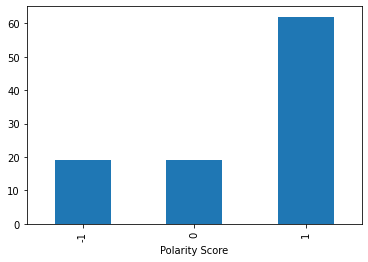

In [ ]:
# Graph tallied Polarity Score 
pltr_newsapi_sentiment_df.groupby('Polarity Score').size().plot(kind='bar')

## Yahoo Finance Stock API 

In [ ]:
# Load PLTR stock closing prices from YFinance
pltr_yf = yf.download('PLTR',
                       start='2020-01-01',
                       end='2021-05-31',
                       progress=False,
                    #    index_col ='Date',
                       infer_datetime_format= True,
                       parse_dates = True,
                       interval='1d'

)
# Create DataFrame
pltr_yf_df = pd.DataFrame(pltr_yf)
pltr_yf_df.reset_index(inplace=True)
# Reorder DataFrame columns
pltr_yf_df=pltr_yf_df.sort_values('Date')
# pltr_yf_df['Date'] = pd.to_datetime(pltr_yf_df['Date']).dt.date
pltr_yf_df.set_index('Date',inplace=True)
# set_index(pltr_yf_df['Date']).to_datetime().dt.date
#Drop All columsn except 'Close'
pltr_yf_df.drop(columns=['Open','High','Low','Volume','Adj Close'],inplace=True)
pltr_yf_df.info()
pltr_yf_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2020-09-30 to 2021-04-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   134 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


,Close
Date,
2020-09-30,9.500000
2020-10-01,9.460000
2020-10-02,9.200000
2020-10-05,9.030000
2020-10-06,9.900000
...,...
2021-04-07,22.900000
2021-04-08,23.410000
2021-04-09,24.040001


In [ ]:
## Concat Close price data frame with NewsApi Vader sentiment  
pltr_yf_newsapi = pd.concat([pltr_yf_df,newsapi_sent_avg],axis=1,join='outer')
pltr_yf_newsapi.dropna(inplace=True)
pltr_yf_newsapi.info()
# combined_sent_df = pd.read_csv('/content/pltr_twitter_df.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2021-03-10 to 2021-04-09
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           22 non-null     float64
 1   compound        22 non-null     float64
 2   positive        22 non-null     float64
 3   negative        22 non-null     float64
 4   neutral         22 non-null     float64
 5   Polarity Score  22 non-null     float64
dtypes: float64(6)
memory usage: 1.2 KB


## VADER COMBINED DATAFRAME

In [ ]:
## WE NEED TO FIX THIS CHECK THIS (???)
pltr_sent_df= pd.concat([pltr_yf_twitter, pltr_yf_newsapi], axis='columns', join="inner", ignore_index=False)
cols='Close','Compound (Tweets)', 'Positive (Tweets)','Negative (Tweets)','Neutral (Tweets)','Polarity Score (Tweets)','Compound Cumulative Returns (Tweets)','Compound (NewsApi)', 'Positive (NewsApi)','Negative (NewsApi)','Neutral (NewsApi)','Polarity Score (NewsApi)'
#pltr_sent_df.drop(columns=['CumReturn'],inplace=True) # WE MAY NOT  NEED THIS AFTER A FRESH RUN
#pltr_sent_df = pltr_sent_df.columns(cols) 
#pltr_sent_df.rename(columns=cols)## HOW DO WE CHANGE THE COLUMN NAMES?
## WE NEED TO DROP ONLY ONE CLOSE COLUMN - CHANGE NAME TO T
pltr_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2021-03-10 to 2021-04-01
Freq: B
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Close                   17 non-null     float64
 1   compound                17 non-null     float64
 2   positive                17 non-null     float64
 3   negative                17 non-null     float64
 4   neutral                 17 non-null     float64
 5   Polarity Score          17 non-null     float64
 6   Compound Returns        17 non-null     float64
 7   Rolling 5 Day Compound  17 non-null     float64
 8   Close                   17 non-null     float64
 9   compound                17 non-null     float64
 10  positive                17 non-null     float64
 11  negative                17 non-null     float64
 12  neutral                 17 non-null     float64
 13  Polarity Score          17 non-null     float64
 14  Compound Returns

In [ ]:
pltr_yf_newsapi.info() ## OR WE RENAME CLOSE COLUMN HERE TO DROP IN COMBINED DF

# THIS WILL ALLOW US TO CREATE HEATMAP OF BOTH TWITTER AND NEWSAPI V CLOSING PRICES


In [ ]:
pltr_yf_twitter = pd.concat([pltr_yf_df,twitter_sent_avg],axis=1,join='outer')
# pltr_yf_twitter.dropna(inplace=True)
pltr_yf_twitter.dropna(inplace=True)
pltr_yf_twitter.head()

,Close,compound,positive,negative,neutral,Polarity Score
2020-09-30,9.50,0.147594,0.094543,0.034711,0.870748,0.272287
2020-10-01,9.46,0.009902,0.080625,0.063405,0.855963,0.101329
2020-10-02,9.20,-0.000485,0.084356,0.061115,0.854532,0.108974
2020-10-05,9.03,0.186457,0.091758,0.033205,0.875005,0.394737
2020-10-06,9.90,0.197717,0.104604,0.036160,0.859233,0.363144


In [ ]:
pltr_yf_twitter.info()
# Save CSV file 
pltr_yf_twitter.to_csv("pltr_yf_twitter_df.csv", index=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-09-30 to 2021-04-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           127 non-null    float64
 1   compound        127 non-null    float64
 2   positive        127 non-null    float64
 3   negative        127 non-null    float64
 4   neutral         127 non-null    float64
 5   Polarity Score  127 non-null    float64
dtypes: float64(6)
memory usage: 11.9 KB


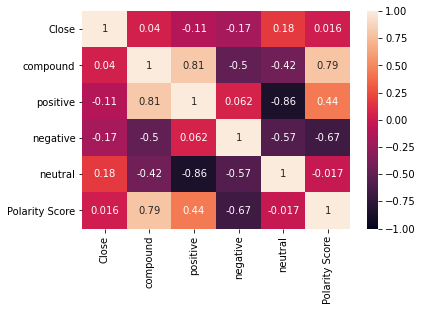

In [ ]:
import seaborn as sns

newsapi_yf_corr = pltr_yf_newsapi.corr()
sns.heatmap(newsapi_yf_corr,vmin=-1,vmax=1,annot=True)

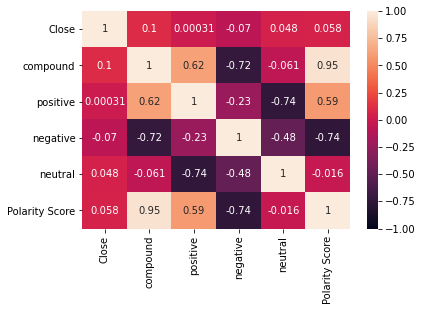

In [ ]:
twitter_yf_corr = pltr_yf_twitter.corr()
sns.heatmap(twitter_yf_corr,vmin=-1,vmax=1,annot=True)

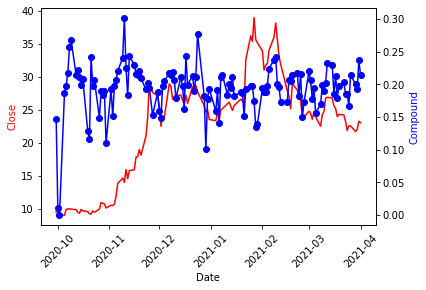

In [ ]:
twitter_compound_returns = pltr_yf_twitter["compound"].pct_change()
twitter_compound_returns2= (1 + twitter_compound_returns).cumprod()
pltr_yf_twitter['Compound Returns'] = twitter_compound_returns2

twitter_rolling_compound = pltr_yf_twitter["compound"].rolling(5).mean()
pltr_yf_twitter['Rolling 5 Day Compound'] = twitter_rolling_compound

newsapi_compound_returns = pltr_yf_newsapi["compound"].pct_change()
newsapi_compound_returns2= (1 + newsapi_compound_returns).cumprod() # THIS DOES NOT PRODUCE VALUABLE DATA - SEE HEATMAP BELOW
pltr_yf_newsapi['Compound Returns'] = newsapi_compound_returns2

newsapi_rolling_compound = pltr_yf_newsapi["compound"].rolling(5).mean()
pltr_yf_newsapi['Rolling 5 Day Compound'] = newsapi_rolling_compound

# PLOT THE CLOSING PRICE AND DATE
fig, ax =plt.subplots()
ax.plot(pltr_yf_twitter.index, pltr_yf_twitter.Close, color="red")
# ax.plot(pltr_yf_newsapi.index, pltr_yf_newsapi.Close, color="green")
plt.xticks(rotation=45)
ax.set_xlabel("Date")
ax.set_ylabel("Close", color='red')

# PLOT THE COMPOUND SENTIMENT SCORES
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(pltr_yf_twitter.index, pltr_yf_twitter["compound"],color="blue",marker="o")
#ax2.plot(pltr_yf_newsapi.index, pltr_yf_newsapi["compound"], color="purple", marker="o")
ax2.set_ylabel("Compound",color="blue")
plt.show()

## PLOT THE ROLLING COMPOUND SENTIMENT SCORES
#ax2.plot(pltr_yf_twitter.index, twitter_rolling_compound,color="blue",marker="o")
# ax2.plot(pltr_yf_newsapi.index, newsapi_rolling_compound, color="purple", marker="o")
#ax2.set_ylabel("5 Day Rolling Compound",color="blue")
#plt.show()

In [ ]:
newsapi_compound_returns

2021-03-10         NaN
2021-03-11   -1.137622
2021-03-12   -1.000000
2021-03-15         inf
2021-03-16    8.388787
2021-03-17   -0.513208
2021-03-18   -1.363200
2021-03-19   -7.177863
2021-03-22   -0.650878
2021-03-23    1.607230
2021-03-24   -0.773991
2021-03-25    1.392764
2021-03-26   -0.551894
2021-03-29   -0.792026
2021-03-30   -8.603627
2021-03-31   -1.531772
2021-04-01   -0.056650
2021-04-05    4.651641
2021-04-06   -0.576709
2021-04-07   -0.437966
2021-04-08    1.193976
2021-04-09   -0.003972
Name: compound, dtype: float64

In [ ]:
newsapi_compound_returns2

2021-03-10         NaN
2021-03-11   -0.137622
2021-03-12   -0.000000
2021-03-15         NaN
2021-03-16         NaN
2021-03-17         NaN
2021-03-18         NaN
2021-03-19         NaN
2021-03-22         NaN
2021-03-23         NaN
2021-03-24         NaN
2021-03-25         NaN
2021-03-26         NaN
2021-03-29         NaN
2021-03-30         NaN
2021-03-31         NaN
2021-04-01         NaN
2021-04-05         NaN
2021-04-06         NaN
2021-04-07         NaN
2021-04-08         NaN
2021-04-09         NaN
Name: compound, dtype: float64

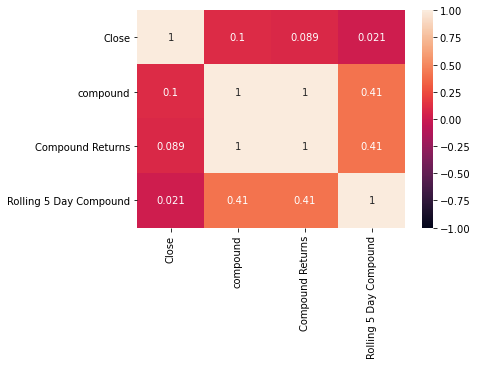

In [ ]:
# pltr_yf_twitter.head()
twitter_yf_corrs = pltr_yf_twitter[['Close','compound','Compound Returns','Rolling 5 Day Compound']].corr()
sns.heatmap(twitter_yf_corrs,vmin=-1,vmax=1,annot=True)

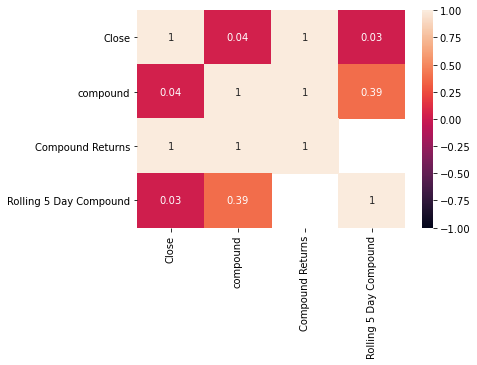

In [ ]:
newsapi_yf_corrs = pltr_yf_newsapi[['Close','compound','Compound Returns','Rolling 5 Day Compound']].corr()
sns.heatmap(newsapi_yf_corrs,vmin=-1,vmax=1,annot=True)

## VADER Sentiments WordCloud 

In [ ]:
df = pltr_twitter_sentiment_df["Polarity Score"]  ## WHAT IS THIS LINE FOR???
#pltr_twitter_sentiment_df[pltr_twitter_sentiment_df["Polarity Score"]=='-1']
words = ' '.join(pltr_twitter_sentiment_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("PLTR")
stopwords.add("Palantir")

twitter_wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

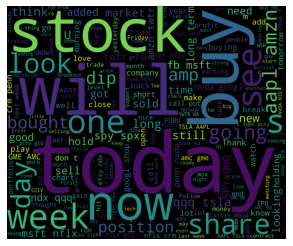

In [ ]:
plt.figure(1,figsize=(5, 5))
plt.imshow(twitter_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
### NEWSAPI WORDCLOUD
df = pltr_newsapi_sentiment_df["Polarity Score"]  ## WHAT IS THIS LINE FOR???
#pltr_twitter_sentiment_df[pltr_twitter_sentiment_df["Polarity Score"]=='-1']
words = ' '.join(pltr_newsapi_sentiment_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
stopwords = set(STOPWORDS)
stopwords.add("PLTR")
stopwords.add("Palantir")

newsapi_wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

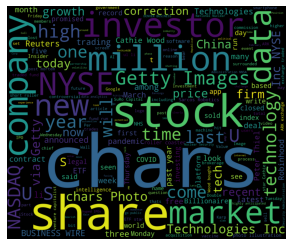

In [ ]:
plt.figure(1,figsize=(5, 5))
plt.imshow(newsapi_wordcloud)
plt.axis('off')
plt.show()

## TWITTER TEXTBLOB SENTIMENT ANALYSIS

In [ ]:
# !pip install textblob
from textblob import TextBlob
pltr_tb_sentiments = []
for index, row in pltr_twitter_df.iterrows():
    try:
        text = row["Tweet"]
        date = row["Date"]
        analysis = TextBlob(text).sentiment
        analysisSub= TextBlob(text).subjectivity
        analysisPol= TextBlob(text).polarity
        pltr_tb_sentiments.append({
            "text": text,
            "date": date,
            "TB Subjectivity Score": analysisSub,
            "TB Polarity Score":analysisPol
        })
    except AttributeError:
        pass
pltr_tb_sentiment_df = pd.DataFrame(pltr_tb_sentiments)
pltr_tb_sentiment_df

,text,date,TB Subjectivity Score,TB Polarity Score
0,Don’t forget buy $PLTR tomorrow. Don’t sleep,2020-09-29,0.000000,0.000000
1,Why? Why do they have to keep giving us new in...,2020-09-29,0.427273,0.118182
2,Got $PLTR on my radar tomorrow. It's a growing...,2020-09-29,1.000000,0.600000
3,The data-mining-software company Palantir Tech...,2020-09-29,0.405556,0.033333
4,What you need to know about about Palantir lis...,2020-09-29,0.000000,0.000000
...,...,...,...,...
234644,@thetradingchick Didn’t know you were in $PLTR...,2021-04-03,0.762963,0.208333
234645,@GeniusStocks @alexcutler247 @gurgavin @SpacBo...,2021-04-03,1.000000,0.000000
234646,@GeniusStocks @alexcutler247 @gurgavin @SpacBo...,2021-04-03,1.000000,0.000000
234647,"$PLTR Bullish count leading into Demo day, bea...",2021-04-03,1.000000,0.850000


In [ ]:
#Drop duplicates
pltr_tb_sentiment_df.drop_duplicates(inplace=True)
pltr_tb_sentiment_df
#Create & Save PLTR TEXT BLOB Sentiment as CSV file
pltr_tb_sentiment_df.to_csv("ptlr_tb_sentiment_df.csv", index=True)

In [ ]:
### CALCULATE AVERAGE BY DATE
twitter_tb_sent_avg = pltr_tb_sentiment_df.groupby('date', as_index=True, sort=True)['TB Subjectivity Score','TB Subjectivity Score'].mean()
twitter_tb_sent_avg.info()
twitter_tb_sent_avg

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 2020-09-29 to 2021-04-03
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TB Subjectivity Score  187 non-null    float64
 1   TB Subjectivity Score  187 non-null    float64
dtypes: float64(2)
memory usage: 4.4+ KB


<ipython-input-60-8d7da218e4ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_tb_sent_avg = pltr_tb_sentiment_df.groupby('date', as_index=True, sort=True)['TB Subjectivity Score','TB Subjectivity Score'].mean()


,TB Subjectivity Score,TB Subjectivity Score
date,,
2020-09-29,0.308556,0.308556
2020-09-30,0.330395,0.330395
2020-10-01,0.371022,0.371022
2020-10-02,0.351119,0.351119
2020-10-03,0.402688,0.402688
...,...,...
2021-03-30,0.344988,0.344988
2021-03-31,0.336835,0.336835
2021-04-01,0.360484,0.360484


# NEWSAPI TEXTBLOB SENTIMENT ANALYSIS

In [ ]:
pltr_tb_newsapi_sentiments = []
for index, row in pltr_newsapi_df.iterrows():
    try:
        text = row["content"]
        date = row["publishedAt"]
        analysis = TextBlob(text).sentiment
        analysisSub= TextBlob(text).subjectivity
        analysisPol= TextBlob(text).polarity
        pltr_tb_sentiments.append({
            "text": text,
            "date": date,
            "TB Subjectivity Score": analysisSub,
            "TB Polarity Score":analysisPol
        })
    except AttributeError:
        pass
pltr_tb_newsapi_sentiment_df = pd.DataFrame(pltr_tb_newsapi_sentiments)
pltr_tb_newsapi_sentiment_df

""


In [ ]:
#Drop duplicates
pltr_tb_newsapi_sentiment_df.drop_duplicates(inplace=True)
pltr_tb_newsapi_sentiment_df

""


## IBM WATSON TONE ANALYSIS - TWITTER AND NEWSAPI

In [ ]:
pltr_twitter_tone_df = pltr_twitter_sentiment_df.drop(columns=['compound','positive','negative','neutral','Polarity Score'])
pltr_twitter_tone_df.head(1)

,text
date,
2020-09-29,Don’t forget buy $PLTR tomorrow. Don’t sleep


In [ ]:
pltr_newsapi_tone_df = pltr_newsapi_sentiment_df.drop(columns=['compound','positive','negative','neutral','Polarity Score'])
pltr_newsapi_tone_df.head(1)

,text
date,
2021-03-10,As we move into the vaccination phase of the C...


In [ ]:

# COMBINE INTO PLTR_TONE_DF
## pltr_combined_tone_df= pd.concat([pltr_twitter_tone_df, pltr_newsapi_tone_df], join="0", ignore_index=True)



In [ ]:
pltr_twitter_tone_df.head(1)

,text
date,
2020-09-29,Don’t forget buy $PLTR tomorrow. Don’t sleep


In [ ]:
from __future__ import print_function

In [ ]:
# Define text to analyze
tweets = pltr_twitter_tone_df["text"]
news = pltr_newsapi_tone_df['text']

#  E.G.
# for row in jsonText:
#     for tones in row['document_tone']['tones']:
#         print(' Name: {} . Score: {}'.format(tone['tone_name'], tone['score']))


tweet_tones = []

for row in tweets:
    for tones in row:
        print(' Name: {} . Score: {}'.format(tone['tone_name'], tone['score']))
    content_type = 'application/json'
    tone = tone_analyzer.tones(row)
    jsonText = json.dumps(tone, indent=2)
    jsonParse = json.loads(jsonText)
    tweet_tones = jsonParse["document_tones"]["tones"]
    print(t)


# # Analyze the text's tone with the 'tone()' method.
# for index, row in pltr_twitter_tone_df.iterrows():
#     try:
#         text = row["text"]
#         date = index
#         tone_analysis = tone_analyzer.tone(    
#             {"text": tweets},
content_type="application/json"
content_language="en"
accept_language="en"
sentences=True
#             ).get_result()
#         # Display tone analysis results
# print(json.dumps(tone_analysis, indent=2))
#         compound = tone_analysis["compound"]
#         pos = tone_analysis["pos"]
#         neu = tone_analysis["neu"]
#         neg = tone_analysis["neg"]
#         pol=  get_sentiment(compound)
        
#         pltr_twitter_tone_df.append({
#             "text": text,
#             "date": date,
#             "compound": compound,
#             "positive": pos,
#             "negative": neg,
#             "neutral": neu,
#             "Polarity Score":pol,
                        
#         },ignore_index=True)
        

for row in news:
    tone_analysis = tone_analyzer.tone([{"text": row},content_type,content_language,accept_language,sentences])
    tweet_tones.append({
        'tone': tone_analysis.get_result()
    },ignore_index=True)

    # except AttributeError:
    #     pass

# Display tone analysis results
# print(json.dump(tone_analysis, indent=2)) 


print(tweet_tones.head(1))

NameError: name 'tone' is not defined

In [ ]:
tone_analysis = tone_analyzer.tone({"text": tweets},content_type="application/json",content_language="en",accept_language="en").get_result()
        # Display tone analysis results
print(json.dumps(tone_analysis, indent=2))

### Transform Tone Analysis json to a DataFrame

In [ ]:
# Document Tones
doc_tone_df = json_normalize(data=tone_analysis["document_tone"], record_path=["tones"])
doc_tone_df

In [ ]:
 # Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df

## WHICH MODEL PRODUCES BETTER RESULTS? VADER v WATSON


##Graph Sentiment score and Stock Price

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (VADER)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (VADER)

##Graph Tone analysis score and Stock Price

In [ ]:
## COMBINE CLOSING PRICES WITH DAILY POLARITY SCORES (WATSON)

# pltr_combined_df = Close + Polarity Scores (Index = Date)


## CHECK CORRELATIONS OF COMPOUND / POS / NEG / NEUTRAL / POLARITY SCORES (WATSON)

## ARIMA MODEL

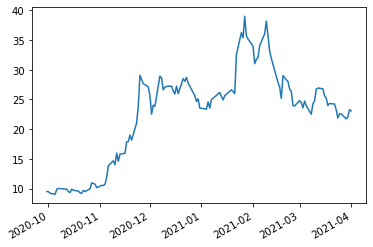

In [ ]:
pltr_yf_twitter['Close'].plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pltr_yf_twitter['Close'], order=(2, 1, 2))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
 results = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  126
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -233.080
Method:                       css-mle   S.D. of innovations              1.513
Date:                Tue, 13 Apr 2021   AIC                            478.160
Time:                        20:07:22   BIC                            495.178
Sample:                             1   HQIC                           485.074
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1073      0.157      0.685      0.494      -0.200       0.414
ar.L1.D.Close     0.6937      0.063     11.003      0.000       0.570       0.817
ar.L2.D.Close    -0.8393      0.053    -15.873      0.000      -0.943      -0.736
ma.L1.D.Close    -0.6673      0.016    -41.803      0.000      -0.699      -0.636
ma.L2.D.Close     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4133           -1.0103j            1.0916           -0.1882
AR.2            0.4133           +1.0103j            1.0916            0.1882
MA.1            0.3337           -0.9427j            1.0000           -0.1959
MA.2            0.3337           +0.9427j            1.0000            0.1959
-----------------------------------------------------------------------------
"""

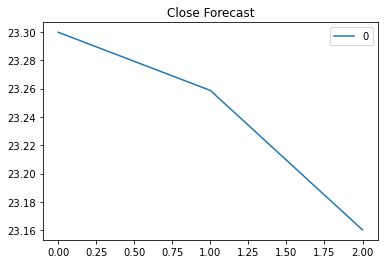

In [ ]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Close Forecast") 

## ML and LSTM Model 

DATA PREPARATION

In [ ]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
#from numpy.random import seed

#seed(1)
from tensorflow import random

#random.set_seed(2)

In [ ]:
# Load the stocks data
df =pltr_yf_twitter

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2020-09-30 to 2021-04-01
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Close                   127 non-null    float64
 1   compound                127 non-null    float64
 2   positive                127 non-null    float64
 3   negative                127 non-null    float64
 4   neutral                 127 non-null    float64
 5   Polarity Score          127 non-null    float64
 6   Compound Returns        126 non-null    float64
 7   Rolling 5 Day Compound  123 non-null    float64
dtypes: float64(8)
memory usage: 13.9 KB


## Creating the Features X and Target y Data
The first step towards preparing the data is to create the input features vectors X and the target vector y. We will use the window_data() function to create these vectors.This function chunks the data up with a rolling window of Xt - window to predict Xt.The function returns two numpy arrays:
X: The input features vectors.y: The target vector.
The function has the following parameters:
df: The original DataFrame with the time series data.window: The window size in days of previous closing prices that will be used for the prediction.feature_col_number: The column number from the original DataFrame where the features are located.target_col_number: The column number from the original DataFrame where the target is located.

In [ ]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 120

feature_column = 1
target_column = 0
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:120]} \n")
print (f"y sample values:\n{y[:120]}") 

X sample values:
[[ 0.1475944   0.00990249 -0.00048462  0.18645737  0.1977168   0.21753883
   0.25677612  0.2672227   0.21431333  0.22229048  0.2113217   0.19835278
   0.20755682  0.12833636  0.11675606  0.24131887  0.19730506  0.20661339
   0.14902125  0.18904964  0.18424925  0.18976963  0.11033462  0.19209341
   0.15127969  0.19768085  0.20663358  0.220375    0.24057968  0.30226188
   0.22522065  0.18304893  0.24337393  0.23017512  0.21640369  0.21488835
   0.22088409  0.20899207  0.19214351  0.20234602  0.19457663  0.15268566
   0.18762497  0.15933802  0.14774989  0.19790076  0.20535888  0.21669083
   0.21494345  0.2196225   0.20721026  0.17887345  0.21104125  0.19710227
   0.16178099  0.24351584  0.19941092  0.21308867  0.19040539  0.2109
   0.27711481  0.18245189  0.10063616  0.17768564  0.1930488   0.15890746
   0.19140885  0.14018198  0.21144762  0.21396865  0.18415591  0.20001872
   0.195117    0.21064899  0.18187953  0.18802862  0.18625221  0.151379
   0.1929494   0.19782421  

In [ ]:
print(X.shape)

(7, 120)


## Splitting Data Between Training and Testing Sets
To avoid the dataset being randomized, we will manually split the data using array slicing.

In [ ]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

## Scaling Data with MinMaxScaler
Once the training and test datasets are created, we need to scale the data before training the LSTM model. We will use the MinMaxScaler from sklearn to scale all values between 0 and 1.Note that we scale both features and target sets.

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

 ## Reshape Features Data for the LSTM Model
The LSTM API from Keras needs to receive the features data as a vertical vector, so that we need to reshape the X data in the form reshape((X_train.shape[0], X_train.shape[1], 1)).Both sets, training, and testing are reshaped.

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}") 

X_train sample values:
[[[0.57559898]
  [0.03880024]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.27858395]
  [0.84831439]
  [1.        ]
  [0.92441193]
  [0.84723858]
  [0.75918036]
  [0.65506485]
  [0.72895561]
  [0.09296758]
  [0.        ]
  [1.        ]
  [0.90331891]
  [1.        ]
  [0.47318017]
  [0.90118396]
  [0.76755381]
  [0.72187147]
  [0.        ]
  [0.2703214 ]
  [0.        ]
  [0.12273768]
  [0.19783632]
  [0.31310415]
  [0.48258805]
  [1.        ]
  [0.6990753 ]
  [0.        ]
  [1.        ]
  [1.        ]
  [0.8441089 ]
  [0.91208387]
  [1.        ]
  [1.        ]
  [0.81312767]
  [1.        ]
  [0.81283733]
  [0.0715941 ]
  [0.57839479]
  [0.16123149]
  [0.        ]
  [0.46693858]
  [0.64996425]
  [0.92805559]
  [0.91910572]
  [0.70767254]
  [0.55581268]
  [0.20912088]
  [0.60268364]
  [0.43214464]
  [0.        ]
  [0.64506731]
  [0.55969809]
  [0.63720178]
  [0.50866908]
  [0.6247999 ]
  [1.        ]
  [0.88533046]
  [0.        ]
  [0.50827148]
  [0.71648198]
  

 
## Build and Train the LSTM RNN
In this section, we will design a custom LSTM RNN in Keras and fit (train) it using the training data we defined.We will need to:
Define the model architecture in Keras.Compile the model.Fit the model to the training data.

## Importing the Keras Modules
The LSTM RNN model in Keras uses the Sequential model and the LSTM layer as we did before. However, there is a new type of layer called Dropout.
Dropout: Dropout is a regularization technique for reducing overfitting in neural networks. This type of layer applies the dropout technique to the input.

In [ ]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 

## Defining the LSTM RNN Model Structure
To create an LSTM RNN model, we will add LSTM layers. The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer. The input_shape is the number of time steps and the number of indicatorsAfter each LSTM layer, we add a Dropout layer to prevent overfitting. The parameter passed to the Dropout layer is the fraction of nodes that will be drop on each epoch, for this demo, we will use a dropout value of 0.2, it means that on each epoch we will randomly drop 20% of the units.The number of units in each LSTM layers, is equal to the size of the time window, in this demo, we are taking five previous T-Bons closing price to predict the next closing price.

In [ ]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

## Compiling the LSTM RNN Model
We will compile the model, using the adam optimizer, as loss function, we will use mean_square_error since the value we want to predict is continuous.

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Summarize the model
model.summary() 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 120, 5)            140       
_________________________________________________________________
dropout_24 (Dropout)         (None, 120, 5)            0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 120, 5)            220       
_________________________________________________________________
dropout_25 (Dropout)         (None, 120, 5)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_26 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

## Training the Model
Once the model is defined, we train (fit) the model using 10 epochs. Since we are working with time-series data, it's important to set shuffle=False since it's necessary to keep the sequential order of the data.We can experiment with the batch_size parameter; however, smaller batch size is recommended; in this demo, we will use a batch_size=1.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
4/4 [==============================] - 6s 76ms/step - loss: 0.1405
Epoch 2/10
4/4 [==============================] - 0s 74ms/step - loss: 0.1062
Epoch 3/10
4/4 [==============================] - 0s 86ms/step - loss: 0.1124
Epoch 4/10
4/4 [==============================] - 0s 80ms/step - loss: 0.0644
Epoch 5/10
4/4 [==============================] - 0s 83ms/step - loss: 0.1267
Epoch 6/10
4/4 [==============================] - 0s 97ms/step - loss: 0.1002
Epoch 7/10
4/4 [==============================] - 0s 72ms/step - loss: 0.0543
Epoch 8/10
4/4 [==============================] - 0s 88ms/step - loss: 0.0717
Epoch 9/10
4/4 [==============================] - 0s 72ms/step - loss: 0.0914
Epoch 10/10
4/4 [==============================] - 0s 81ms/step - loss: 0.0676


## Model Performance
In this section, we will evaluate the model using the test data. We will need to:
Evaluate the model using the X_test and y_test data.Use the X_test data to make predictions.Create a DataFrame of real (y_test) vs predicted values.Plot the Real vs predicted values as a line chart.

 ## Evaluate the Model
It's time to evaluate our model to assess its performance. We will use the evaluate method using the testing data.

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.3300


0.3300303816795349

## Making Predictions
We will make some closing price predictions using our brand new LSTM RNN model and our testing data.

In [ ]:
# Make some predictions
predicted = model.predict(X_test)

Since we scaled the original values using the MinMaxScaler, we need to recover the original prices to better understand the predictions.We will use the inverse_transform() method of the scaler to decode the scaled values to their original scale.

In [ ]:
 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1)) 

## Plotting Predicted Vs. Real Prices
To plot the predicted vs. the real values, we will create a DataFrame.

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
stocks

,Real,Predicted
2021-03-30,22.040001,22.088583
2021-03-31,23.290001,22.089062
2021-04-01,23.070000,22.087719


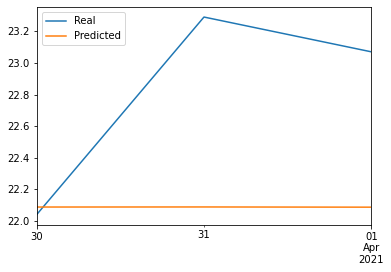

In [ ]:
stocks.plot()